<a href="https://colab.research.google.com/github/Sanatan321/OPenCV/blob/master/Face_recognition_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
import numpy as np
from glob import glob

Using TensorFlow backend.


In [0]:
size=[224,224]
train_path = '/content/drive/My Drive/My_Images/Train'
valid_path = '/content/drive/My Drive/My_Images/Test'

In [0]:
vgg = VGG16(input_shape=size + [3], weights='imagenet', include_top=False)

In [0]:
for layer in vgg.layers:
  layer.trainable = False

In [0]:
folders = glob('/content/drive/My Drive/My_Images/Train/*')

In [0]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [0]:
model = Model(inputs=vgg.input, outputs=prediction)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_gen = ImageDataGenerator(rescale = 1./255)


In [0]:
train_set = train_gen.flow_from_directory('/content/drive/My Drive/My_Images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_gen.flow_from_directory('/content/drive/My Drive/My_Images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 135 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [0]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set))

Epoch 1/5
5/5 [==============================] - 68s 14s/step - loss: 1.1499 - accuracy: 0.6148 - val_loss: 5.0524 - val_accuracy: 0.4130
Epoch 2/5
5/5 [==============================] - 2s 356ms/step - loss: 0.5410 - accuracy: 0.7926 - val_loss: 6.3291 - val_accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 2s 419ms/step - loss: 0.1161 - accuracy: 0.9407 - val_loss: 10.2704 - val_accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 2s 418ms/step - loss: 0.1155 - accuracy: 0.9481 - val_loss: 10.1029 - val_accuracy: 0.0000e+00
Epoch 5/5
5/5 [==============================] - 2s 403ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 10.5917 - val_accuracy: 0.0000e+00


In [0]:
import matplotlib.pyplot as plt


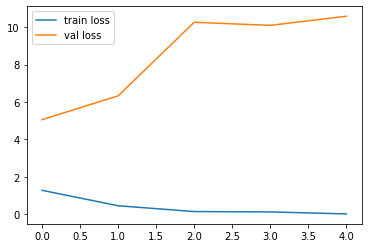

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

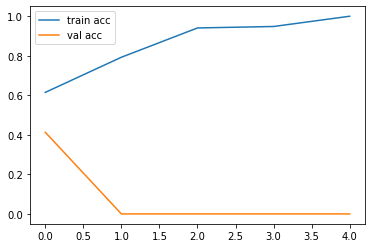

In [0]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [0]:
model.save('facefeatures_new_model.h5')